In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics


In [2]:
#membaca dataset
df=pd.read_csv('movie_metadata.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#memuat dataset
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [5]:
df.shape

(5043, 28)

In [6]:
df.info

<bound method DataFrame.info of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1

In [7]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [9]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [19]:
df['language'].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [21]:
df['gross'].value_counts()

gross
47000000.0     3
34964818.0     3
5773519.0      3
3000000.0      3
177343675.0    3
              ..
39026186.0     1
33422806.0     1
33423521.0     1
32519322.0     1
85222.0        1
Name: count, Length: 4035, dtype: int64

In [23]:
df['num_voted_users'].value_counts()

num_voted_users
57        5
6         4
3119      3
38        3
53        3
         ..
34910     1
188785    1
25484     1
39306     1
4285      1
Name: count, Length: 4826, dtype: int64

In [25]:
df['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [27]:
df.movie_title[df.language == 'English']

0                                         Avatar 
1       Pirates of the Caribbean: At World's End 
2                                        Spectre 
3                          The Dark Knight Rises 
5                                    John Carter 
                          ...                    
5038                     Signed Sealed Delivered 
5039                   The Following             
5040                        A Plague So Pleasant 
5041                            Shanghai Calling 
5042                           My Date with Drew 
Name: movie_title, Length: 4704, dtype: object

In [29]:
bw=df[df.language == 'English']

In [31]:
bw

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [33]:
scores=bw.imdb_score[bw.imdb_score>=7]

In [35]:
name=bw.movie_title[bw.imdb_score>=7]

In [37]:
genre=bw.genres[bw.imdb_score>=7]

In [39]:
hollywoodmovieratings=pd.concat([name,genre,scores],axis=1)

In [41]:
hollywoodmovieratings

,movie_title,genres,imdb_score
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,7.1
3,The Dark Knight Rises,Action|Thriller,8.5
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,7.8
8,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,7.5
...,...,...,...
5015,Slacker,Comedy|Drama,7.1
5033,Primer,Drama|Sci-Fi|Thriller,7.0
5036,The Mongol King,Crime|Drama,7.8
5038,Signed Sealed Delivered,Comedy|Drama,7.7


In [43]:
hollywoodmovieratings.value_counts()

movie_title                genres                                      imdb_score
Halloween                  Horror|Thriller                             7.9           3
King Kong                  Action|Adventure|Drama|Romance              7.2           3
Night of the Living Dead   Drama|Horror|Mystery                        8.0           2
Trance                     Crime|Drama|Mystery|Thriller                7.0           2
Syriana                    Drama|Thriller                              7.0           2
                                                                                    ..
Her                        Drama|Romance|Sci-Fi                        8.0           1
Heroes                     Drama|Fantasy|Sci-Fi|Thriller               7.7           1
Heroes of Dirt             Action|Drama|Sport                          7.1           1
Henry V                    Action|Biography|Drama|History|Romance|War  7.7           1
Zombieland                 Adventure|Comedy|Horr

In [45]:
hollywoodmovieratings.head(10)

,movie_title,genres,imdb_score
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,7.1
3,The Dark Knight Rises,Action|Thriller,8.5
7,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,7.8
8,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,7.5
9,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery,7.5
13,Pirates of the Caribbean: Dead Man's Chest,Action|Adventure|Fantasy,7.3
15,Man of Steel,Action|Adventure|Fantasy|Sci-Fi,7.2
17,The Avengers,Action|Adventure|Sci-Fi,8.1
20,The Hobbit: The Battle of the Five Armies,Adventure|Fantasy,7.5


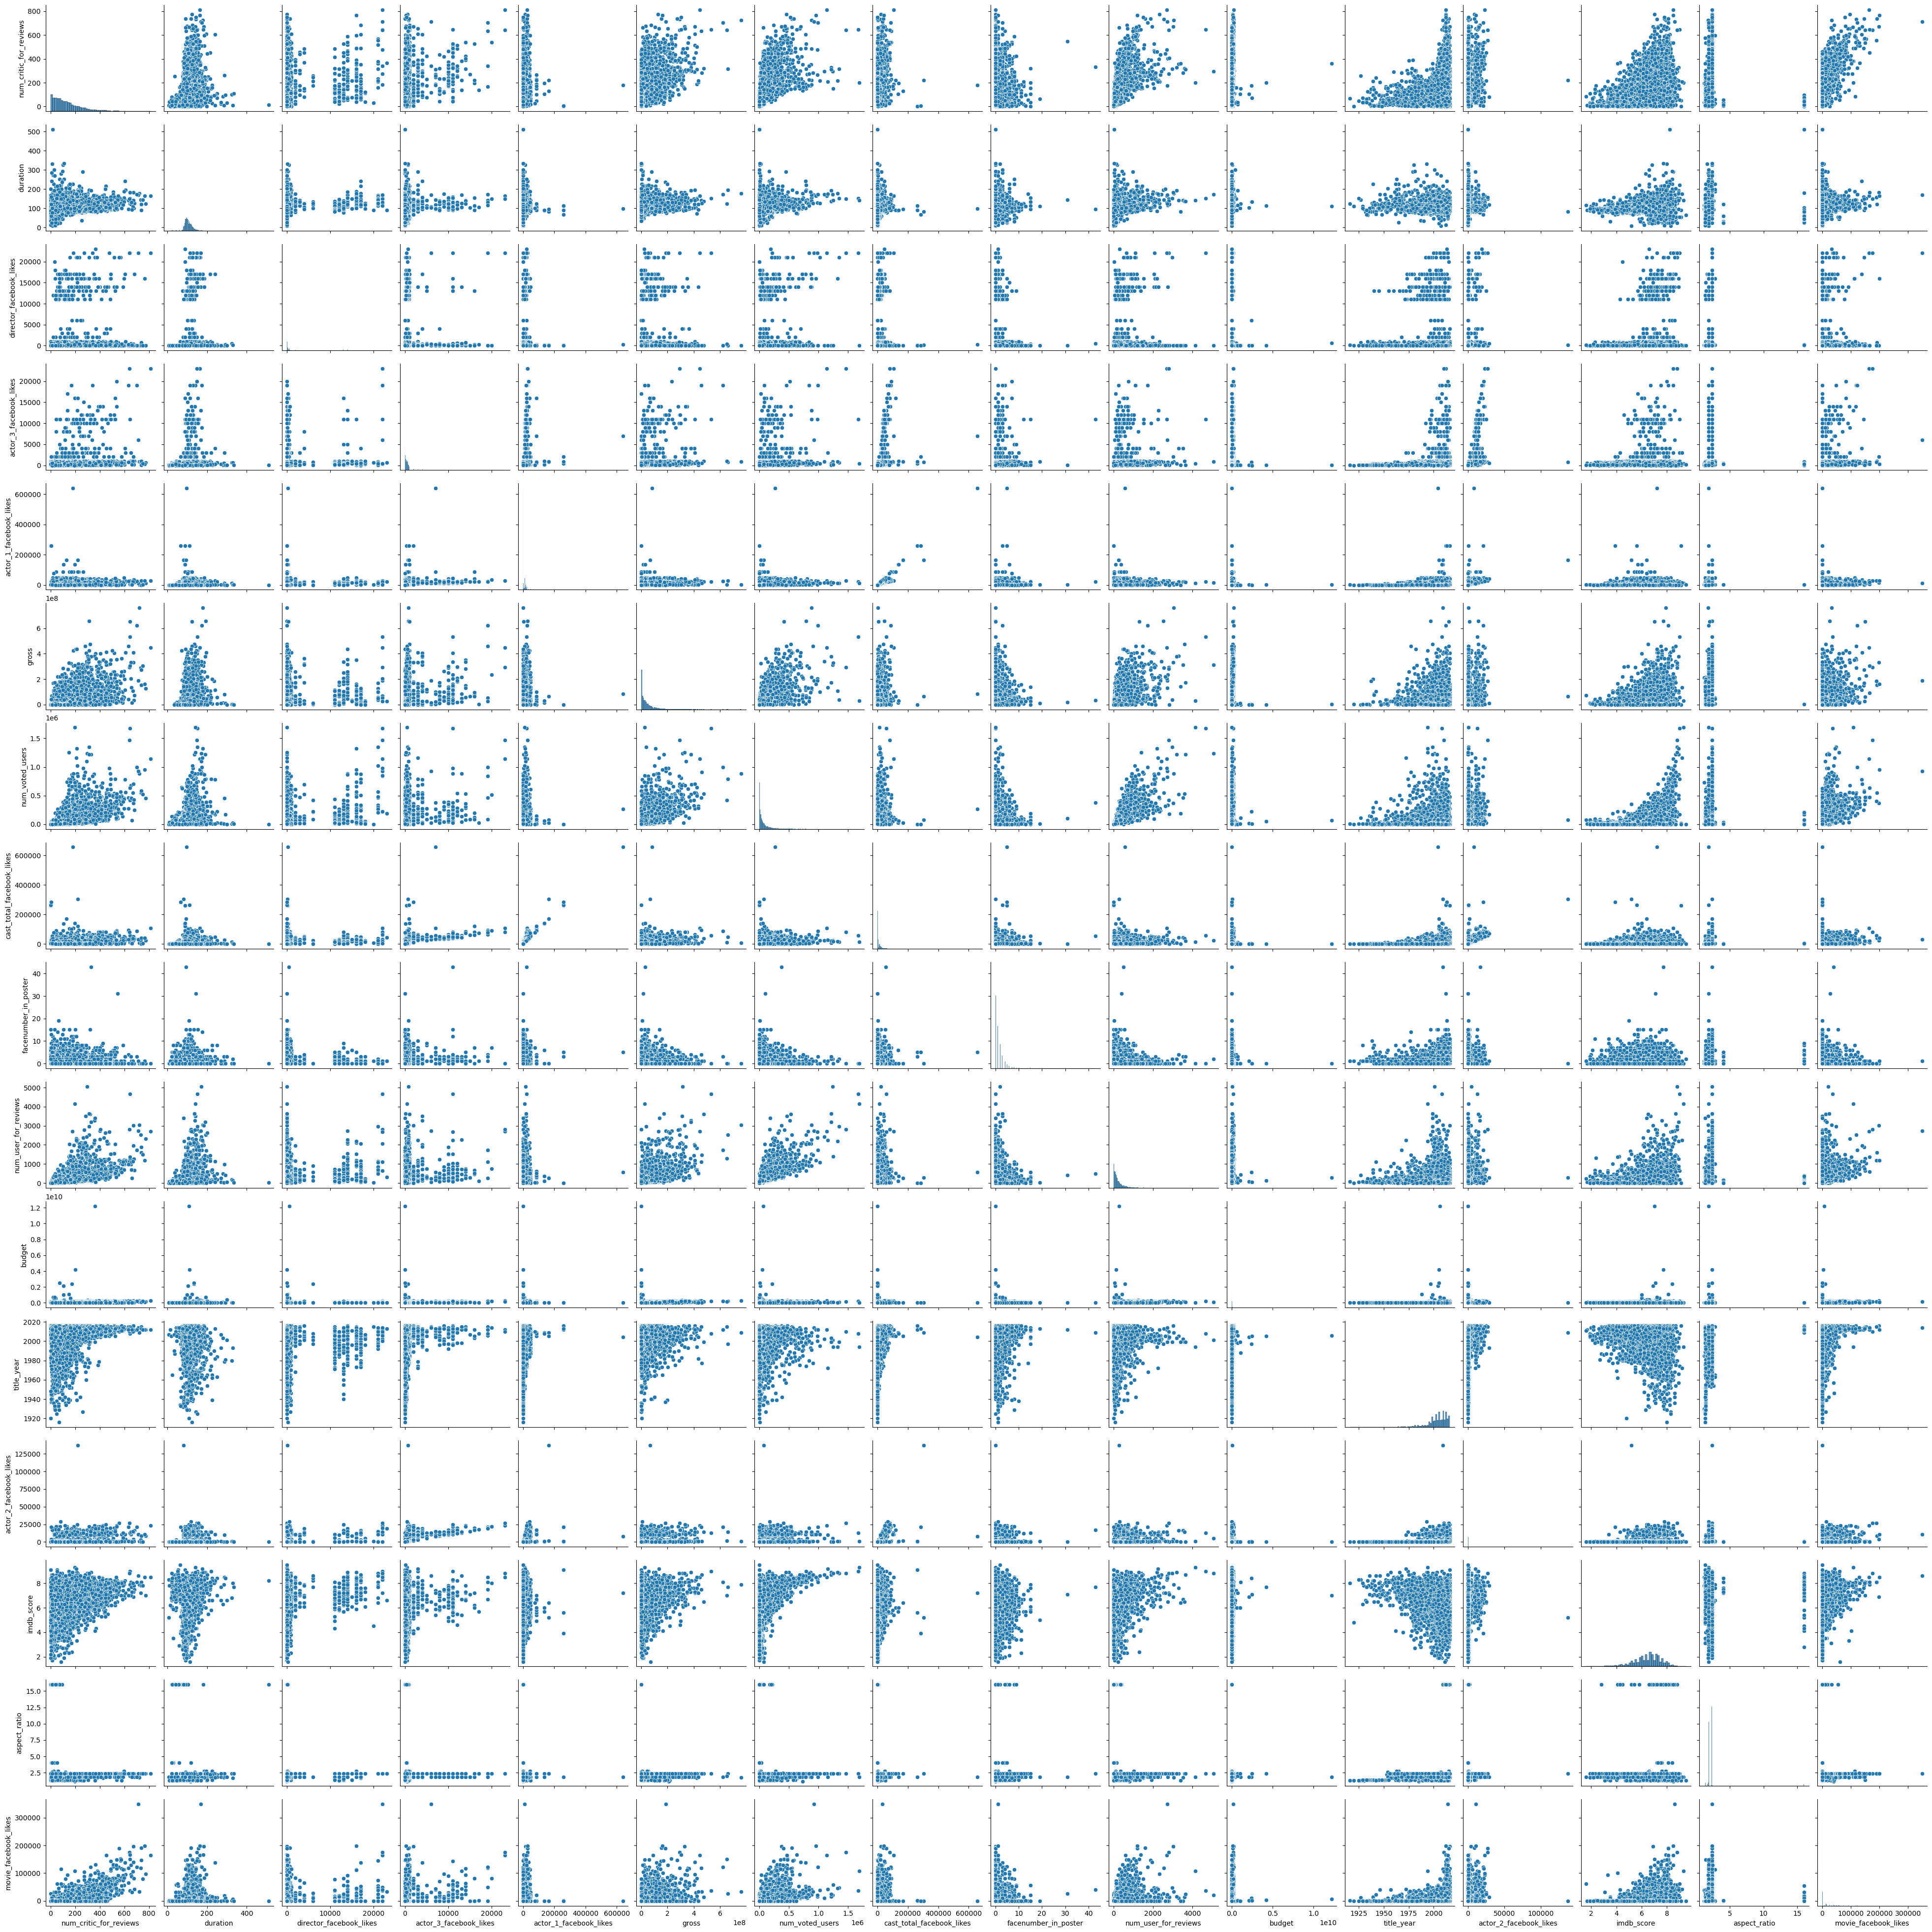

In [47]:
sns.pairplot(data=df)

<Axes: ylabel='count'>

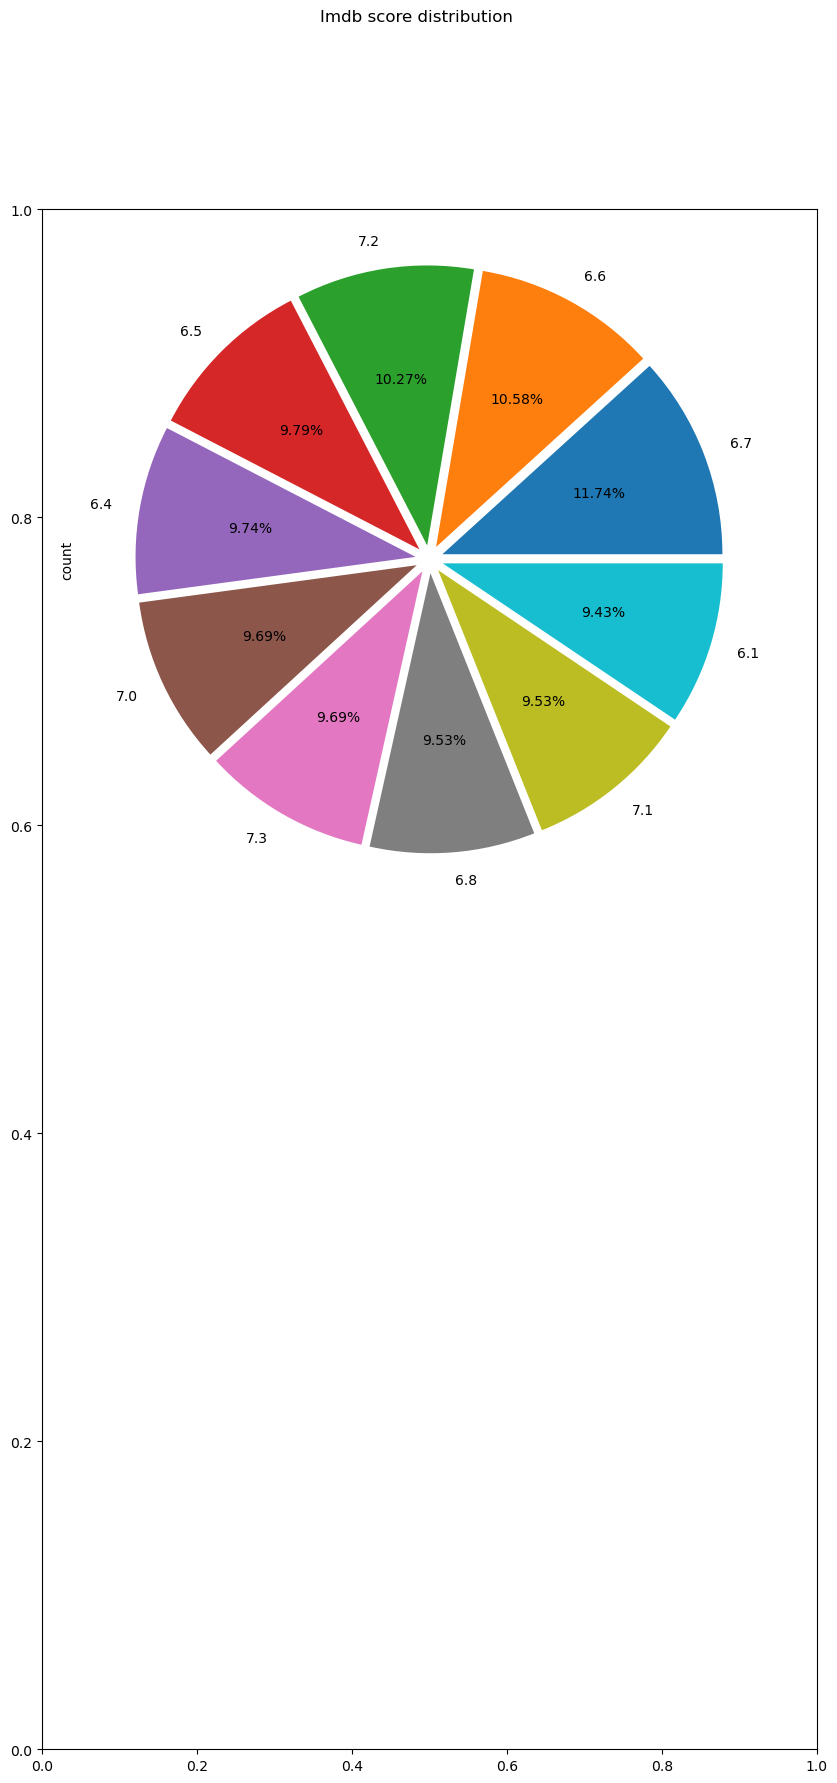

In [48]:
f,ax=plt.subplots(figsize=(10,20))
ax1=plt.subplot(211)
f.suptitle("Imdb score distribution")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
df['imdb_score'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)

In [51]:
#Selanjutnya melakukan visualisasi data berupa pie plot untuk top 10 IMDb. Terlihat disini tentang distribusi score IMDB,
#dengan jumlah paling banyak yaitu sekitar 11.74% dari data memilki score IMDb 6.7 .


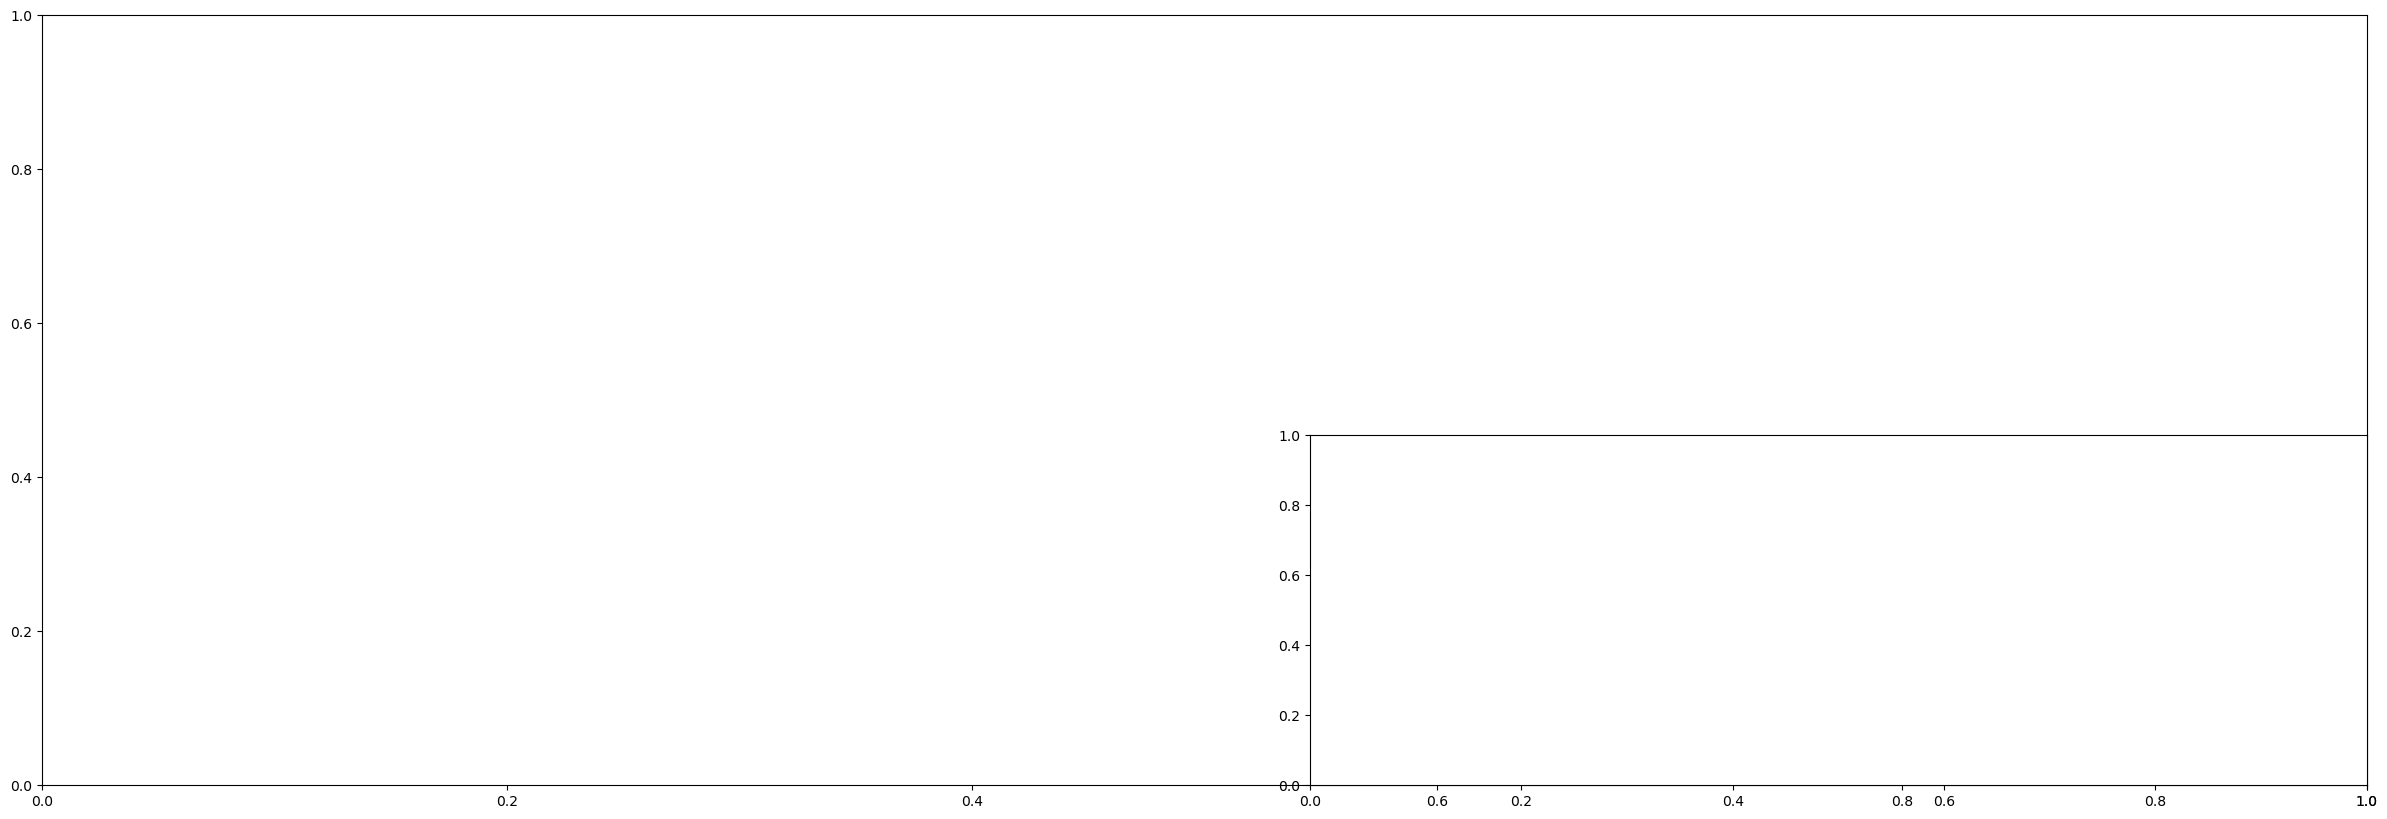

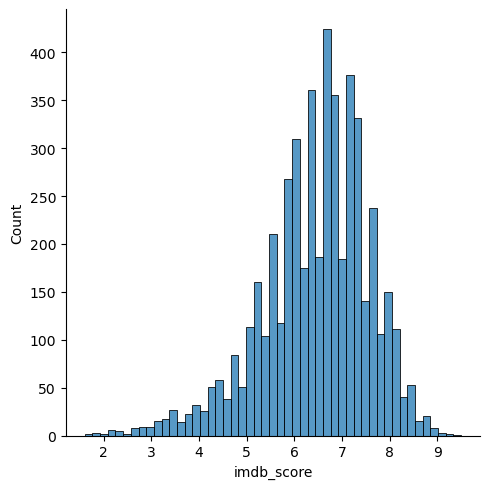

In [53]:
f,ax=plt.subplots(figsize=(30,10))
ax3=plt.subplot(224)
sns.displot(df['imdb_score'],ax=ax3)

In [55]:
#Selanjutnya menggunakan distribution plot. Terlihat disini bahwa score tertinggi di IMDb yaitu diantara 6 sampai 8

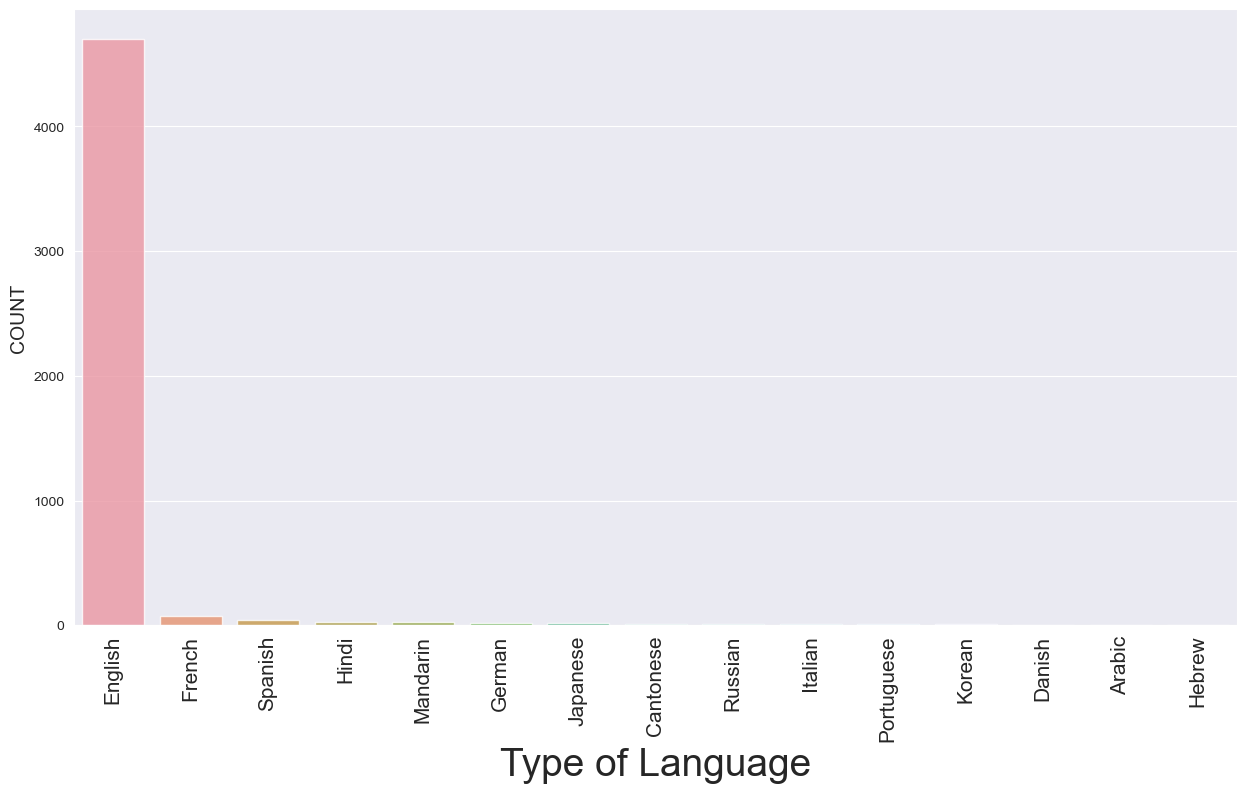

In [57]:
sns.set_style("darkgrid")
ls=df['language'].value_counts().head(15).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Type of Language', fontsize=28)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()

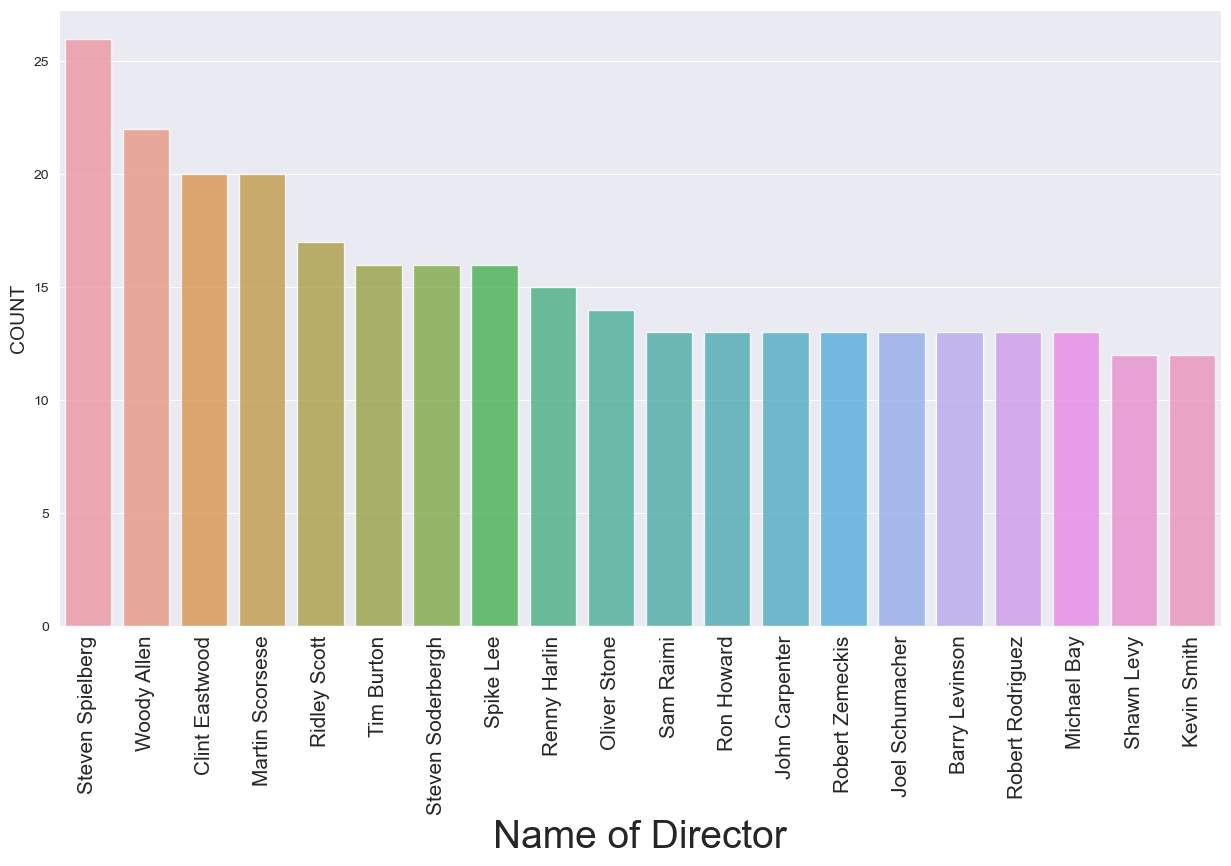

In [59]:
sns.set_style("darkgrid")
ls=df['director_name'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Name of Director', fontsize=28)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()

In [61]:
#Melakukan visualisasi tentang nama sutradara sekarang dari dataset. terlihat bahwa steven Spielberg memiliki banyak karya film buatan beliau-
#dengan jumlah sekitar 27 karya.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'TV-MA'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'Unrated'),
  Text(10, 0, 'Approved'),
  Text(11, 0, 'TV-Y'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'X'),
  Text(14, 0, 'TV-Y7'),
  Text(15, 0, 'GP'),
  Text(16, 0, 'Passed'),
  Text(17, 0, 'M')])

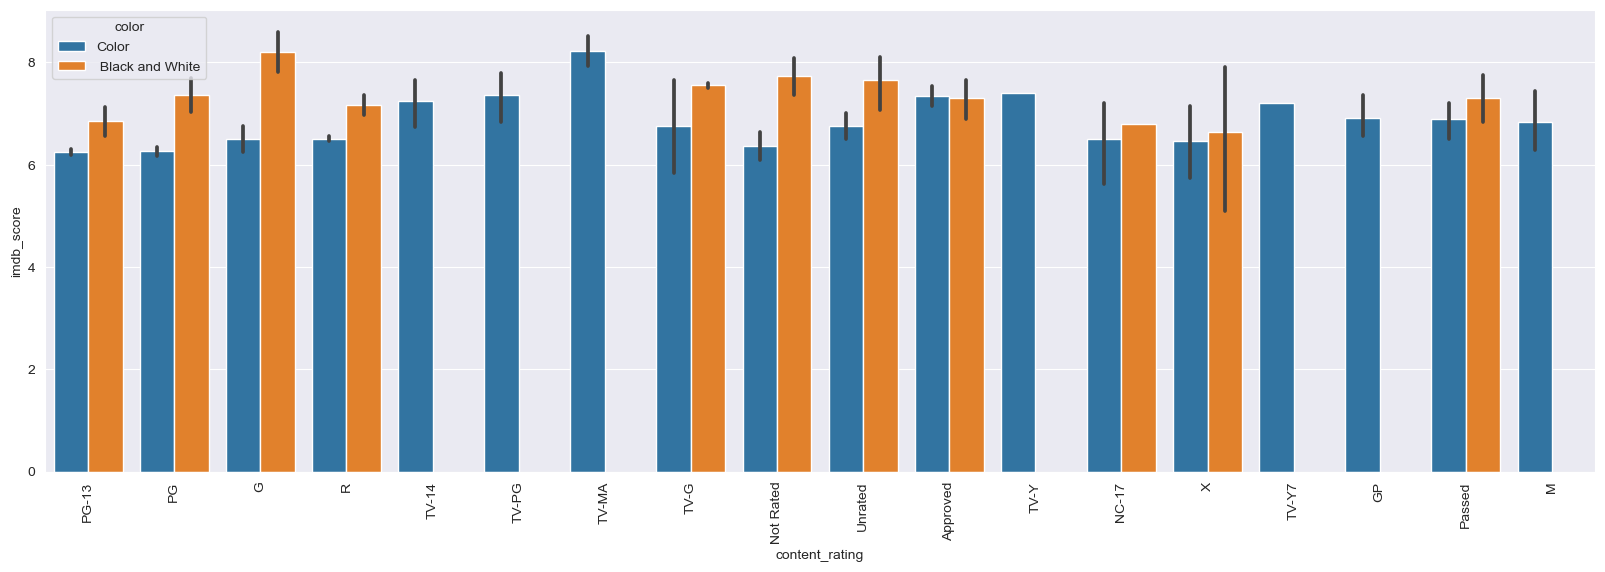

In [63]:
plt.figure(figsize=(20,6))
sns.barplot(x='content_rating',y='imdb_score',hue='color',data=df);
plt.xticks(rotation=90)

In [64]:
#Melakukan visualisasi tentang tipe rating film yang memiliki score IMDb tertinggi dan juga menampilkan 2 tipe jenis film yaitu berwarna dan hitam putih. 
#Terlihat bahwa tipe film dengan rating TV-MA dan G memiliki jumlah yang hampir sama, yaitu dengan score 8.


In [67]:
df=df.dropna()

In [69]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [71]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [73]:
df=df.drop(columns=['movie_imdb_link','color','facenumber_in_poster','plot_keywords','actor_3_name','movie_imdb_link','aspect_ratio','language'])

In [75]:
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,776,39.0,France,R,4500.0,2004.0,133.0,6.9,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,5,26.0,Iran,Not Rated,10000.0,2000.0,0.0,7.5,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,371.0,USA,PG-13,7000.0,2004.0,45.0,7.0,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,130.0,USA,R,7000.0,1992.0,20.0,6.9,0


In [77]:
df.shape

(3755, 21)

In [79]:
cat_cols=['content_rating','director_name','genres','actor_1_name','actor_2_name','country']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

director_name                  int32
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int32
actor_1_facebook_likes       float64
gross                        float64
genres                         int32
actor_1_name                   int32
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int32
content_rating                 int32
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

In [81]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [83]:
skewed_features=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes']

In [85]:
for i in skewed_features:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df [i] = np.log(df[i]+1)

In [87]:
#Melakukan splitting dataset menjadi variable dependen dan independent untuk dilakukan linear regression dan random forest regressor

In [89]:
X=df.drop(labels=['imdb_score'],axis=1)
Y=df['imdb_score']
X.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,6.431331,6.584791,5.187386,0.000000,6.752270,6.909753,6.908755,20.449494,4.521789,5.247024,NaN,13.694704,8.483636,8.024535,3.78419,2.079442,19.283571,7.605890,6.842683,10.404293
1,6.289716,5.713733,5.135798,6.335054,6.908755,7.372746,10.596660,19.550159,4.454347,6.532334,NaN,13.063082,10.786242,7.122060,3.78419,2.079442,19.519293,7.604894,8.517393,0.000000
2,7.240650,6.401917,5.003946,0.000000,5.087596,7.492760,9.305741,19.114199,4.682131,5.556828,NaN,12.527681,9.367430,6.902743,3.76120,2.079442,19.316769,7.608871,5.976351,11.350418
3,5.529429,6.701960,5.105945,9.998843,10.043293,5.942799,10.203629,19.920595,5.497168,7.200425,NaN,13.950337,11.578339,7.901748,3.78419,2.079442,19.336971,7.607381,10.043293,12.007628
5,4.143135,6.137727,4.890349,6.165418,6.274762,7.515889,6.463029,18.106774,4.663439,5.777652,NaN,12.265308,7.535830,6.605298,3.78419,2.079442,19.390323,7.607381,6.450470,10.085851


In [91]:
Y.head()

0    2.186051
1    2.091864
2    2.054124
3    2.251292
5    2.028148
Name: imdb_score, dtype: float64

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3004, 20) (751, 20) (3004,) (751,)


In [95]:
#Linear regression

In [97]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

lm = LinearRegression().fit(X_train_imputed, Y_train)

train_pred = lm.predict(X_train_imputed)
test_pred = lm.predict(X_test_imputed)

RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))

print("RMSE on Training Data:", RMSE_train)
print("RMSE on Testing Data:", RMSE_test)

RMSE on Training Data: 0.11999357358766358
RMSE on Testing Data: 0.12031121642892656


In [99]:
errors = abs(test_pred  -Y_test)

In [101]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy :', round(accuracy, 2), '%.')

Accuracy : 95.43 %.


In [103]:
#Random Forest Regressor

In [105]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

lm = RandomForestRegressor().fit(X_train_imputed, Y_train)

train_pred = lm.predict(X_train_imputed)
test_pred = lm.predict(X_test_imputed)

RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))

print("RMSE on Training Data:", RMSE_train)
print("RMSE on Testing Data:", RMSE_test)

RMSE on Training Data: 0.04177712333424462
RMSE on Testing Data: 0.10006015431698206


In [107]:
errors = abs(test_pred  -Y_test)

In [109]:
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy :', round(accuracy, 2), '%.')

Accuracy : 96.28 %.


In [ ]:
#Nilai akurasi dari error mean pada Linear regression menggunakan RMSE dengan mencapai 95.43 % dan untuk random forest regressor, 
# nilainya mencapai 96.28%. Perbandingan secara akurasi, random forest regressor memberikan prediksi yang lebih baik berdasarkan - 
# metrik akurasi yang digunakan, karena nilainya sedikit lebih tinggi dibandingkan linear regression
#Jika untuk kompleksitas model, Regresi linear adalah model yang sederhana dan mudah diinterpretasikan, sementara random forest adalah model yang lebih-
# kompleks dan mungkin sulit untuk dianalisis secara langsung.